<a href="https://colab.research.google.com/github/HaydarRizaldy/Credit-Card-Customers-Statistics/blob/main/Tugas_Besar_Statistika.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Kelompok VII**

**Anggota Kelompok:**
- Haydar Rizaldy Putera Prayudi
- Raihan Romzi Rakhman
- Ilo Raditio Wiriawan
- Azhar Nugraha

# **Libraries**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.express as ex

# **Data**

Dataset diperoleh dari situs Kaggle, yaitu dengan link: https://www.kaggle.com/sakshigoyal7/credit-card-customers.

In [ ]:
# Membuat inisialisasi file dataset
data = pd.read_csv('BankChurners.csv')

# Menampilkan dataset 
data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


# **Research Question**

Terdapat beberapa informasi mengenai data tersebut yang akan kami berikan kepada manajer kartu kredit.

**1.** Berapa banyak pengguna kartu kredit berdasarkan kategori kartunya?

**2**. Berapa rata-rata jumlah transaksi pengguna berdasarkan kategori kartunya?

**3.** Berapa presentase jumlah pengguna kartu kredit berdasarkan pendapatannya?

**4.** Apakah pelanggan berjenis kelamin perempuan lebih banyak melakukan transaksi kartu kredit daripada pelanggan laki-laki?

**5.** Adakah korelasi antara umur pelanggan dengan jumlah transaksi pelanggan?

**6.** Apakah umur pelanggan menentukan jumlah transaksi pelanggan?

**7.** Bagaimana korelasi jumlah transaksi dengan jumlah kredit yang dikeluarkan?

**8.** Bagaimana pengaruh kategori kartu kredit terhadap limit kredit?

Jawaban dari pertanyaan di atas kami uraikan dalam bentuk analisis eksplorasi data sebagai berikut.

# **Exploratory Data Analysis**

In [ ]:
# Menghapus kolom data yang tidak digunakan
data.drop([
           'CLIENTNUM','Attrition_Flag','Dependent_count','Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Total_Revolving_Bal'
           ,'Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio',
           'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'
           ,'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
          ], axis=1, inplace=True)

# Mendeteksi Missing Value pada data
data.isnull().sum()

Customer_Age       0
Gender             0
Education_Level    0
Marital_Status     0
Income_Category    0
Card_Category      0
Credit_Limit       0
Total_Trans_Amt    0
Total_Trans_Ct     0
dtype: int64

Didapatkan bahwa tidak ada *Missing Value* pada data.

In [ ]:
# Melihat informasi data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer_Age     10127 non-null  int64  
 1   Gender           10127 non-null  object 
 2   Education_Level  10127 non-null  object 
 3   Marital_Status   10127 non-null  object 
 4   Income_Category  10127 non-null  object 
 5   Card_Category    10127 non-null  object 
 6   Credit_Limit     10127 non-null  float64
 7   Total_Trans_Amt  10127 non-null  int64  
 8   Total_Trans_Ct   10127 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 712.2+ KB


Beberapa informasi mengenai data yang diperoleh dari fungsi info(), yaitu:

*   Jumlah Baris dan Kolom data
*   Nama variabel kolom
*   Tipe data tiap kolom
*   Memori yang dipakai
*   Jumlah *Missing Value*

### **1.** Jumlah Pengguna Kartu Kredit Setiap Kategori Kartu Kredit

In [ ]:
# Histogram jumlah pengguna berdasarkan kategori kartu kreditnya
fig = make_subplots(rows=1, cols=1)

fig.add_trace(
    go.Histogram(x = data['Card_Category']),
    row=1, col=1
)

fig.update_layout(height=550, width=650, yaxis_title='Total Transaction Count', title_text="Jumlah Pengguna Berdasarkan Kategori Kartu Kredit")
fig.show()

data.Card_Category.value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

Pada **Histogram** di atas, terlihat jelas bahwa pengguna **Kartu Blue** adalah yang **paling banyak**, yaitu sebanyak 9436 pengguna. Lalu dilanjutkan dengan **Kartu Silver** sebanyak 555 pengguna, **Kartu Gold** sebanyak 116 pengguna, dan yang terakhir **Kartu Platinum** sebanyak 20 pengguna.

Maka, semakin tinggi kategori kartu kredit maka semakin sedikit penggunanya. Dapat disimpulkan bahwa mayoritas pelanggan membutuhkan kartu kategori Blue dibandingkan kartu kategori yang lebih tinggi.

### **2.** Jumlah Transaksi Pengguna Berdasarkan Kategori Kartunya

In [ ]:
# Box Plot jumlah transaksi pengguna berdasarkan kategori kartunya
fig = make_subplots(rows=1, cols=1)

fig.add_trace(
    go.Box(x = data['Card_Category'], y = data['Total_Trans_Ct'], boxmean=True, fillcolor="cyan"),
    row=1, col=1
)

fig.update_layout(height=500, width=650, yaxis_title='Total Transaction Count', title_text="Distribusi Data Jumlah Transaksi Pengguna Berdasarkan Kategori Kartu Kredit")
fig.show()

Berdasarkan distribusi data dengan **Box Plot** di atas, kategori kartu kredit terbukti memengaruhi jumlah transaksi kartu kredit.

**Box Plot** tersebut menunjukkan bahwa semakin tinggi kategori kartu kredit pengguna, maka semakin banyak mereka dalam melakukan transaksi kartu kredit.

### **3.** Jumlah Pengguna Kartu Kredit Berdasarkan Pendapatannya

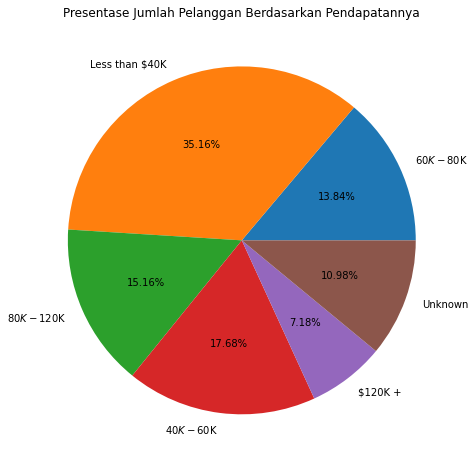

In [ ]:
# Pie Chart jumlah pengguna kartu kredit berdasarkan pendapatannya 
fig, ax = plt.subplots(figsize=(10, 8))
count = Counter(data['Income_Category'])

ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title('Presentase Jumlah Pelanggan Berdasarkan Pendapatannya')
plt.show()

Berdasarkan **Pie Chart** tersebut, didapatkan:

*   Pengguna kartu kredit terbanyak berasal dari pengguna berpendapatan di bawah $40K
*   Semakin tinggi pendapatan semakin rendah minat seseorang untuk menggunakan kartu kredit

Hal ini dikarenakan pelanggan dengan pendapatan rendah lebih sering membutuhkan uang pinjaman dalam bertransaksi yang pastinya sangat membantu mereka dalam memenuhi kebutuhan hidup.

### **4.** Penggunaan Kartu Kredit Berdasarkan Jenis Kelamin Pelanggan

F    5358
M    4769
Name: Gender, dtype: int64

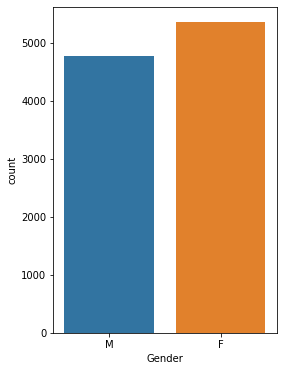

In [ ]:
# Histogram jumlah pelanggan berdasarkan jenis kelamin
plt.figure(figsize = (4,6))
sns.countplot(data=data, x = data["Gender"])

data.Gender.value_counts()

Diperoleh jumlah pelanggan berjenis kelamin perempuan lebih banyak daripada laki-laki.

In [ ]:
# Box Plot jumlah transaksi kartu kredit berdasarkan jenis kelamin
fig = make_subplots(rows=1, cols=1)

fig.add_trace(
    go.Box(x = data['Gender'], y = data['Total_Trans_Ct'], boxmean=True, fillcolor="magenta"),
    row=1, col=1
)

fig.update_layout(height=500, width=650, yaxis_title='Total Transaction Count', title_text="Distribusi Data Jumlah Transaksi Pengguna Berdasarkan Jenis Kelamin")
fig.show()

Berdasarkan **Box Plot** tersebut, pelanggan berjenis kelamin perempuan memiliki nilai rata-rata transaksi kartu kredit lebih tinggi daripada pelanggan laki-laki.

### **5.** Korelasi antara Umur Pelanggan dan Jumlah Transaksi Pelanggan

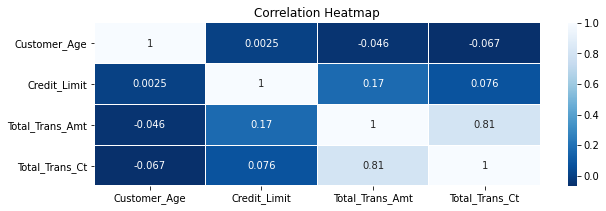

In [ ]:
# Heatmap Korelasi
plt.figure(figsize=(10,3))
plt.title("Correlation Heatmap", color='black')
sns.heatmap(data.corr(), linewidths=0.1, linecolor='white', annot=True, cmap='Blues_r')

Berdasarkan **Correlation Heatmap** di atas, nilai korelasi tertinggi terletak pada variabel data Customer Age dan Total Transaction Count. Sehingga dapat disimpulkan bahwa terdapat korelasi yang kuat antara data Umur Pelanggan dan Jumlah Transaksi Pengguna.

### **6.** Umur Pelanggan menentukan Jumlah Transaksi

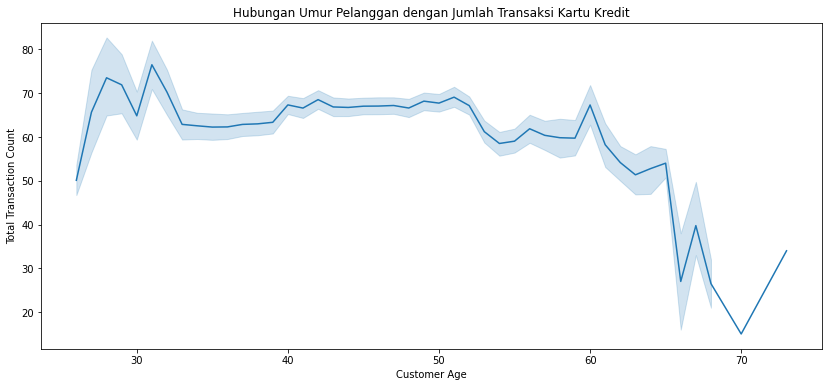

In [ ]:
# Line Plot antara umur pelanggan dan jumlah transaksi kartu kredit
plt.figure(figsize = (14, 6))
plt.title("Hubungan Umur Pelanggan dengan Jumlah Transaksi Kartu Kredit")
plt.xlabel("Customer Age")
plt.ylabel("Total Transaction Count")
sns.lineplot(x = data['Customer_Age'], y = data['Total_Trans_Ct'])

Dari **Line Plot** di atas, didapatkan bahwa semakin tinggi umur pelanggan maka akan semakin rendah jumlah transaksinya. Sehingga, dapat disimpulkan bahwa dengan semakin bertambahnya umur pelanggan maka semakin berkurang minat mereka untuk melakukan transaksi dengan kartu kredit.

## **7.** Korelasi Jumlah Transaksi dan Jumlah Kredit yang Dikeluarkan

In [ ]:
# Scatter Plot jumlah transaksi dan jumlah kredit yang dikeluarkan
fig = ex.scatter(x = data["Total_Trans_Amt"], y = data["Total_Trans_Ct"])
fig.update_layout(title_text="Scatter Plot Total Transaction Amount dengan Total Transaction Count", xaxis_title="Total Transaction Amount", yaxis_title="Total Transaction Count")
fig.show()

Berdasarkan **Correlation Heatmap** pada research question nomor 5, didapatkan nilai korelasi antara Total Transaction Amount dan Total Transaction Count sebesar 0.81. 

Kedua variabel data tersebut memiliki relasi yang cukup kuat dikarenakan penyebaran data pada **Scatter Plot** berbentuk diagonal dari kiri bawah ke kanan atas.

## **8.** Pengaruh Kategori Kartu Terhadap Limit Kredit

In [ ]:
# Limit Kredit Tetinggi Pada Tiap Kategori Kartu Kredit 
data.iloc[data.groupby('Card_Category')['Credit_Limit'].agg(pd.Series.idxmax)]

,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Credit_Limit,Total_Trans_Amt,Total_Trans_Ct
45,49,M,Uneducated,Single,$80K - $120K,Blue,34516.0,1444,28
6,51,M,Unknown,Married,$120K +,Gold,34516.0,1330,31
443,48,M,Graduate,Unknown,$80K - $120K,Platinum,34516.0,1156,29
61,48,M,Graduate,Married,$60K - $80K,Silver,34516.0,691,15


In [ ]:
# Limit Kredit Terendah Pada Tiap Kategori Kartu Kredit 
data.iloc[data.groupby('Card_Category')['Credit_Limit'].agg(pd.Series.idxmin)]

,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Credit_Limit,Total_Trans_Amt,Total_Trans_Ct
21,62,F,Graduate,Married,Less than $40K,Blue,1438.3,692,16
9411,40,M,College,Married,$40K - $60K,Gold,3735.0,15039,130
3800,51,F,Doctorate,Married,Less than $40K,Platinum,15987.0,2021,46
9854,51,F,Post-Graduate,Married,$40K - $60K,Silver,3735.0,6826,61


Text(0, 0.5, 'Card Category')

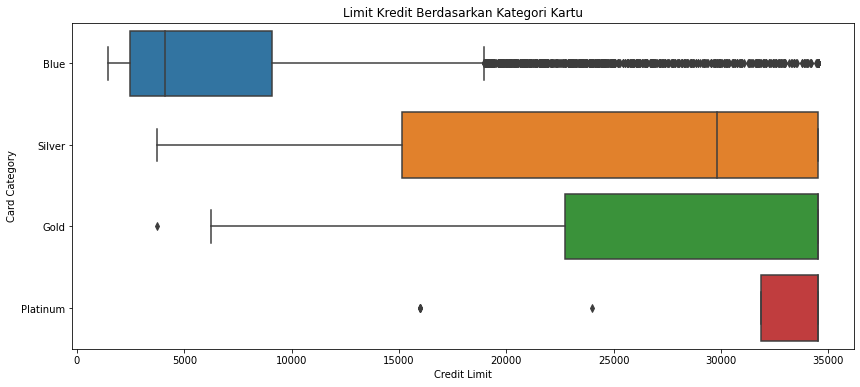

In [ ]:
  # Box Plot kategori kartu terhadap limit kredit
plt.figure(figsize = (14, 6))
plt.title("Limit Kredit Berdasarkan Kategori Kartu")
sns.boxplot(x = data['Credit_Limit'], y = data['Card_Category'], order=["Blue", "Silver", "Gold", "Platinum"])
plt.xlabel("Credit Limit")
plt.ylabel("Card Category")

Berdasarkan **Box Plot** tersebut, didapatkan:

1.   **Kartu Blue**

     Distribusi data cenderung berada di sebelah kiri, menunjukkan rata-rata limit kredit pengguna kartu Blue merupakan yang paling rendah di antara pengguna kartu kategori lain. Rata-rata nilai limit kredit kartu Blue berada di bawah 10000.
     
2.   **Kartu Silver**
     
     Distribusi data cenderung berada di sebelah kanan, menunjukkan rata-rata limit  kredit pengguna kartu Silver termasuk tinggi di antara yang pengguna kartu kategori lain. Limit kredit kartu Silver lebih jauh lebih tinggi dari kartu Blue. Nilai limit kredit kartu Silver ada yang mencapai 34516 namun nilai kuartil terendah di atas angka 15000.

3.   **Kartu Gold**
     
     Distribusi data cenderung berada di sebelah kanan, menunjukkan rata-rata limit  kredit pengguna kartu Gold termasuk tinggi di antara yang pengguna kartu kategori lain. Limit kredit kartu Gold lebih jauh lebih tinggi dari kartu Silver. Nilai limit kredit kartu Gold ada yang mencapai 34516 namun nilai kuartil terendah berada di atas angka 20000.

4.   **Kartu Platinum**
     
     Distribusi data cenderung berada di sebelah kanan, menunjukkan rata-rata limit  kredit pengguna kartu Platinum termasuk tinggi di antara yang pengguna kartu kategori lain. Limit kredit kartu Platinum lebih jauh lebih tinggi dari kartu Platinum. Nilai limit kredit kartu Platinum ada yang mencapai 34516 namun nilai kuartil terendah berada di atas angka 30000. Sehingga rata-rata nilai limit kredit Kartu Platinum berada di antara 30000 dan 35000.

# **Kesimpulan**


Dari data yang ada, kami sudah merumuskan **8 Reasearch Questions** yang selanjutnya kami jawab menggunakan visualisasi data. Oleh karena itu, tujuan dari tugas besar ini yaitu **"Manager bank ingin mendapatkan karakteristik pemegang kartu kredit"** sudah bisa disimpulkan, yaitu:

1.  **Berapa banyak pengguna kartu kredit berdasarkan kategori kartunya?**

    Semakin tinggi level kategori kartu kredit maka semakin sedikit penggunanya. Pelanggan lebih banyak yang membutuhkan kategori kartu kredit Blue.

2.  **Berapa rata-rata jumlah transaksi pengguna berdasarkan kategori kartunya?**

    Semakin tinggi kategori kartu kredit pengguna, maka semakin banyak mereka dalam melakukan transaksi kartu kredit.
    
3.  **Berapa presentase jumlah pengguna kartu kredit berdasarkan pendapatannya?**

    Pengguna kartu kredit terbanyak berasal dari pengguna berpendapatan di bawah $40K. Semakin tinggi pendapatan semakin rendah minat seseorang untuk menggunakan kartu kredit.

4.  **Apakah pelanggan berjenis kelamin perempuan lebih banyak melakukan transaksi kartu kredit daripada pelanggan laki-laki?**

    Ya, perempuan lebih banyak melakukan transaksi kartu kredit daripada laki-laki. Tidak hanya itu, perempuan juga merupakan pengguna kartu kredit terbanyak.
    
5.  **Adakah korelasi antara umur pelanggan dengan jumlah transaksi pelanggan?**

    Terdapat korelasi yang kuat antara data Umur Pelanggan dan Jumlah Transaksi Pengguna.
    
6.  **Apakah umur pelanggan menentukan jumlah transaksi pelanggan?**

    Ya ada, semakin bertambahnya umur pelanggan maka semakin berkurang minat mereka untuk melakukan transaksi dengan kartu kredit.
    
7.  **Bagaimana korelasi jumlah transaksi dengan jumlah kredit yang dikeluarkan?**

    Kedua variabel data tersebut memiliki relasi yang cukup kuat dilihat dari penyebaran data Scatter Plot dan memiliki nilai korelasi sebesar 0,81.
        
8. **Bagaimana pengaruh kategori kartu kredit terhadap limit kredit?**

   Setiap pengguna kartu kredit memiliki limit kredit yang berbeda berdasarkan kategori kartunya. Rata-rata limit setiap kartu dimulai dari angka yang berbeda dengan urutan dari yang terendah, yaitu kartu kredit Blue, Silver, Gold, lalu Platinum. Namun,untuk semua kategori kartu, limit kredit bisa mencapai angka 34516.